In [31]:
# Version Check 습관들이면 좋을듯   
%load_ext watermark
%watermark -v -p numpy, scipy, sklearn, pandas, matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


UsageError: unrecognized arguments: scipy, sklearn, pandas, matplotlib


## Ch04 모델훈련 
### 4.1 선형회귀   

#### 4.1.1 정규방정식  

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
# 선형 데이터 생성 
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # 4 + 3x_1 + 가우시안 잡음

$$ \hat{\theta} = (X^{T}X)^{-1}X^{T}y $$

In [7]:
# 정규방정식 사용 \theta_hat 계산  
X_b = np.c_[np.ones( (100, 1)), X] # 모든 샘플에 x0 = 1 추가 
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)
theta_best


array([[3.86260567],
       [2.93323031]])

In [18]:
# theta_hat 사용 예측 
X_new = np.array( [ [0], [2] ]) # shape = (2,1)
X_new_b = np.c_[np.ones( (2,1) ), X_new] # 모든 샘플에 x0 = 1 추가 

print('# X_new = \n {}'.format(X_new))
print('# X_new_b = \n {}'.format(X_new_b))

y_predict = X_new_b.dot(theta_best) 

print('# y_predict = \n {}'.format(y_predict))

# X_new = 
 [[0]
 [2]]
# X_new_b = 
 [[1. 0.]
 [1. 2.]]
# y_predict = 
 [[3.86260567]
 [9.72906628]]


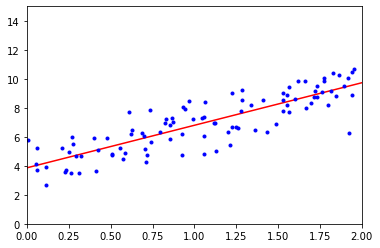

In [21]:
# 모델 예측 그래프
plt.plot(X_new, y_predict, "r-") # red line
plt.plot(X, y, "b.")  # blue dot 
plt.axis([0, 2, 0, 15]) 
plt.show()

In [24]:
# Scikit-Learn 선형회귀 수행 
# 사이킷런은 특성의 가중치 (coef_)와 편향(intercept_)을 분리하여 저장
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X, y) 

print(lin_reg.intercept_, lin_reg.coef_) 
print(lin_reg.predict(X_new)) 

[3.86260567] [[2.93323031]]
[[3.86260567]
 [9.72906628]]


In [25]:
# lstsq: least square 
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # ?????
theta_best_svd

array([[3.86260567],
       [2.93323031]])

Moore-Penrose Inverse Matrix (pseudoinverse)  
$$\hat{\theta}\ = \ X^{+}y

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[3.86260567],
       [2.93323031]])

Singular Value Decompostion (SVD) 
$$X^{+}\ =\ V \Sigma^{+} U^{T}

#### 4.1.2 계산 복잡도

### 4.2 경사하강법 Gradient Descent
* 학습률 Learning Rate  
* 볼록함수 Convex function
* Local Minima, Global Minima

#### 4.2.1 배치 경사 하강법 Batch Gradient Descent

Step of Gradient Descent  
$$ \theta^{(next step)}\ = \ \theta - \eta \nabla_{\theta} MSE(\theta)$$  

$$ \eta = Learning \  Rate$$

In [27]:
eta = 0.1 # eta == learning rate 
n_iterations = 1000
m = 100  # 훈련에 있는 샘플수 

theta = np.random.randn(2, 1) # 무작위 초기화 from normal  

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients  

theta

array([[3.86260567],
       [2.93323031]])

#### 4.2.2 확률적 경사 하강법  
* Learning Rate Schedule  

In [44]:
# simple learing rate schedule  
n_epochs = 50  
t0, t1 = 5, 50 # Parameter of Learning Rate Schedule  
m = 100  # 훈련에 있는 샘플수 

def learning_schedule(t):
    return t0 / (t + t1) 

theta = np.random.randn(2,1) # 무작위 초기화 

for epoch in range(n_epochs):
    for i in range(m):
        
        random_index = np.random.randint(m) 
        
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients 

theta

array([[3.8414408 ],
       [2.95076286]])